![image info](https://ineuron.ai/images/ineuron-logo.png)

###  FEATURE ENGINEERING STEPS 
1. Exploring Features of the dataset
2. Check Correlation using Heatmap
3. Hypothesis Testing ( Check Normal Distribution ) 
      - 3.1) Shapiro Wick Test
      - 3.2) K^2 Normality Test
      - 3.3) Q-Q Plots
4. Checking for Normal Distribution using Transformations
    - 4.1) Log Transformation
    - 4.2) Square-Root Transformation
    - 4.3) Yeo-Johnson Transformation 

###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/google_missing_imputed.csv')

#### Show Top 5 Records

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


## 2. Check Correlation using Heatmap

<AxesSubplot:>

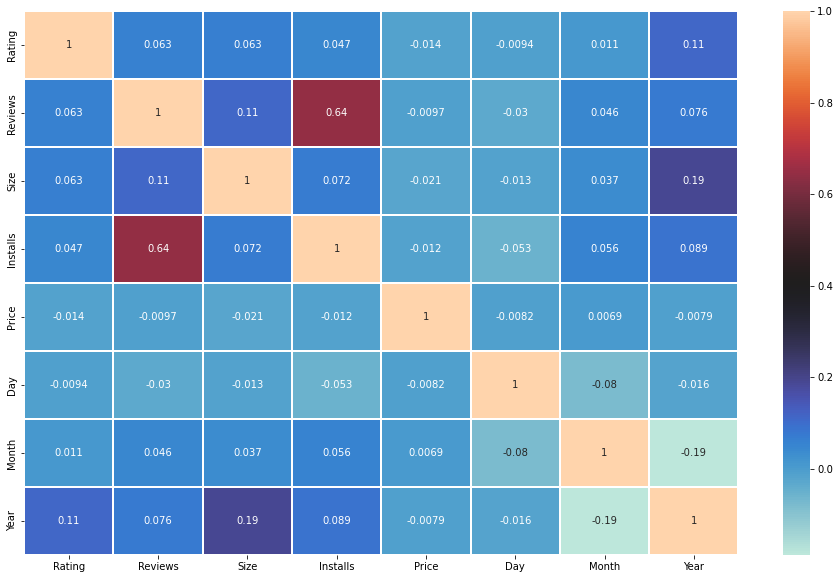

In [4]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix

<Figure size 864x432 with 0 Axes>

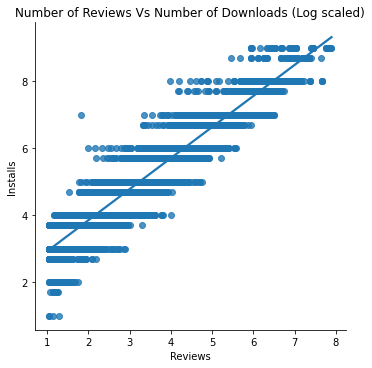

In [5]:
plt.figure(figsize=(12,6))
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

#### Insights
**A High positive correlation of 0.9 exists between the number of reviews and number of downloads.** This means that customers tend to download a given app more if it has been reviewed by a larger number of people. 

This also means that many active users who download an app usually also leave back a review or feedback. 

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

## 3. Hypothesis Testing ( Check Normal Distribution ) 

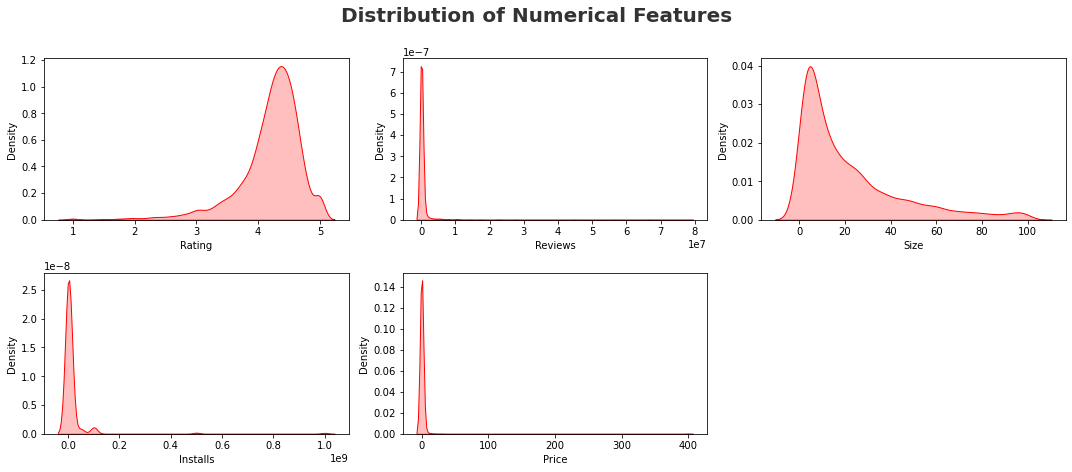

In [20]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

res_list = numeric_features[: len(numeric_features) - 3]
num_df = df[res_list]
for i in range(0, len(res_list)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### 3.1  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [22]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in res_list:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[res_list, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,Rating,Not Normally Distributed
1,Reviews,Not Normally Distributed
2,Size,Not Normally Distributed
3,Installs,Not Normally Distributed
4,Price,Not Normally Distributed


#### 3.2 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [24]:
from scipy.stats import normaltest
normaltest_test = []
for column in res_list:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[res_list, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,Rating,Not Normally Distributed
1,Reviews,Not Normally Distributed
2,Size,Not Normally Distributed
3,Installs,Not Normally Distributed
4,Price,Not Normally Distributed


#### 3.3 Q-Q  Plots
- **A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.**
- **If the data falls in a straight line then the variable follows normal distribution otherwise not.**

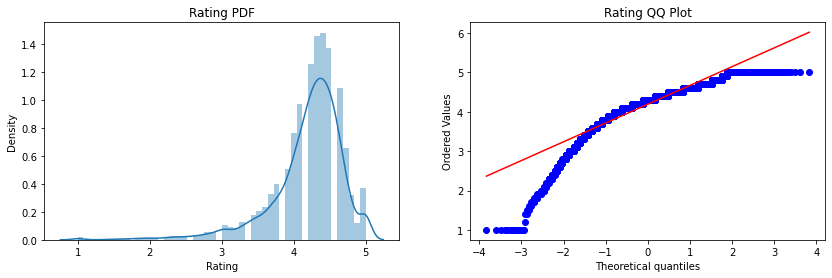

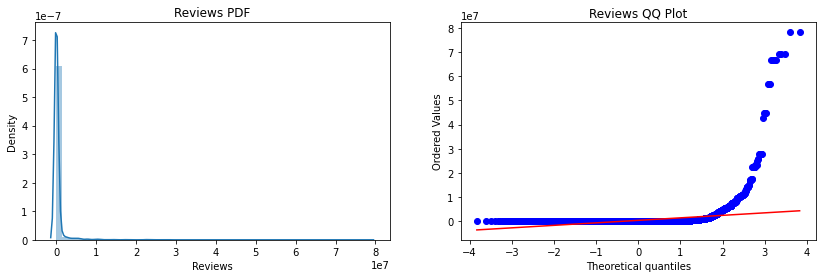

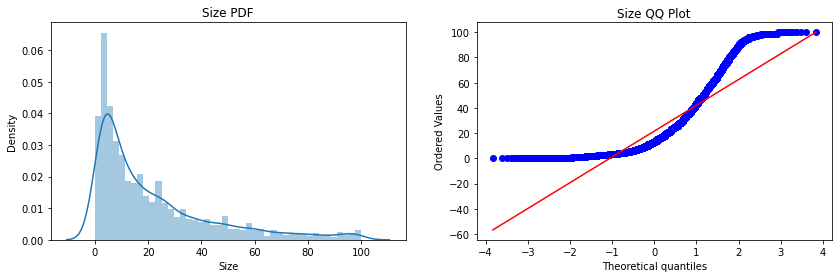

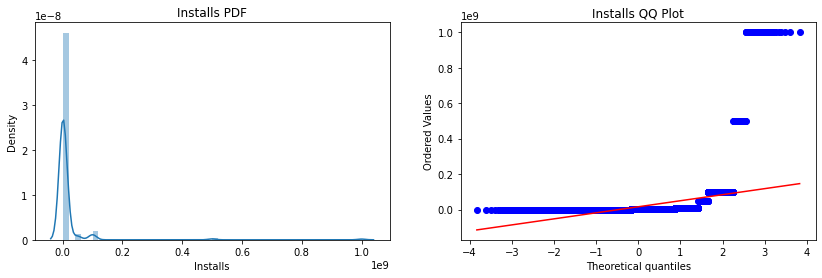

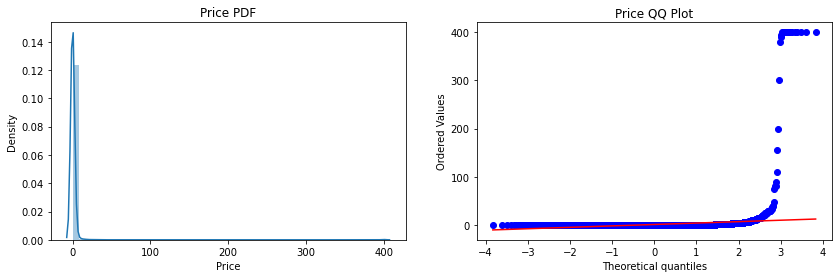

In [27]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()
for col in res_list:
    plot_qq_plot(col)

#### Insights
- None of above Data falls in a straight line, thus the variable does not follows normal distribution.

## 4. Checking for Normal Distribution using Transformations

In [7]:
def plots(df,var,transformer):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' )
    plt.subplot(122)
    sns.kdeplot(transformer)
    plt.title('After')

#### 4.1) Log Transformation
* **In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.**

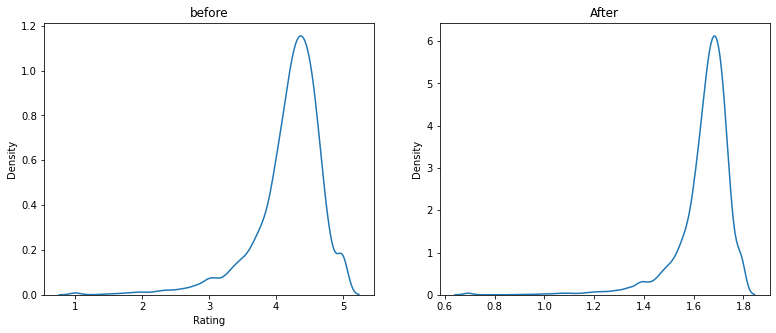

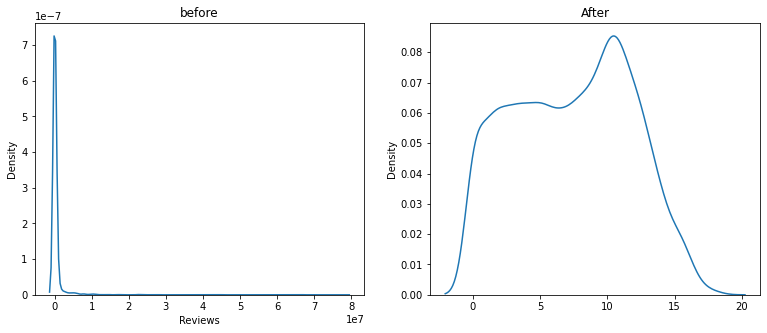

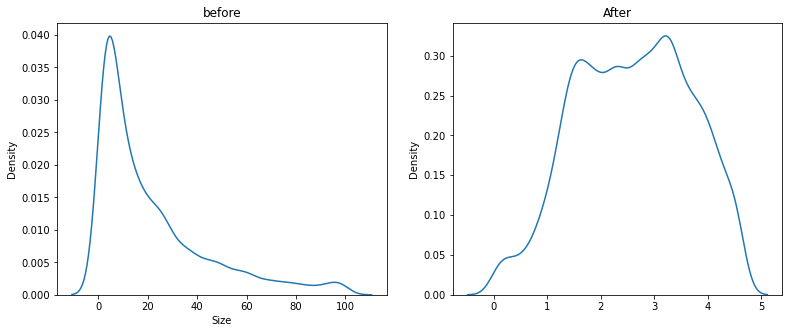

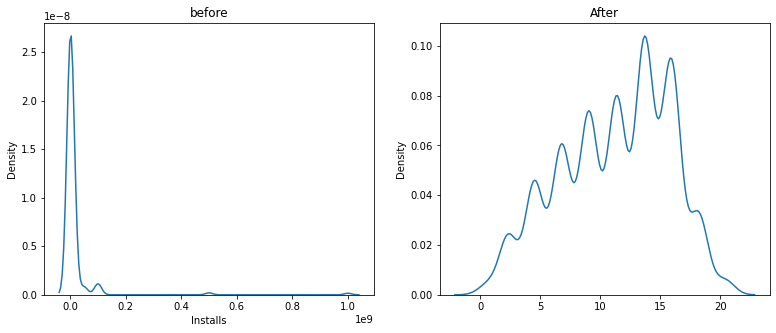

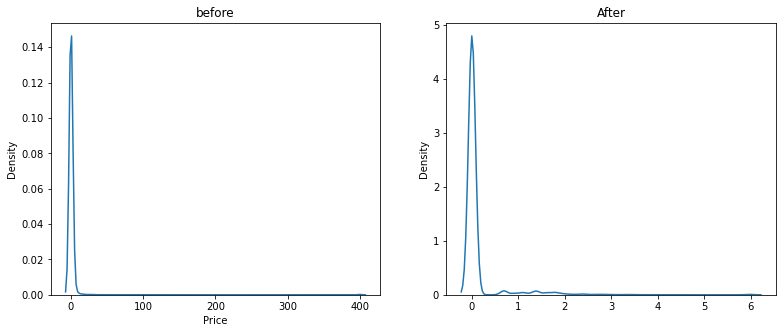

In [8]:
log_transformer = FunctionTransformer(np.log1p)
for col in res_list:
    X = np.array(df[col])
    Y = log_transformer.transform(X)
    plots(df,col,Y)

#### Insights
- For Reviews , Size and Install features Log tranformation has reduced skewness

#### 4.2) Square-Root Transformation
* **Here the x will replace by the square root(x). It is weaker than the Log Transformation.**
* **The main advantage of square root transformation is, it can be applied to zero values.**

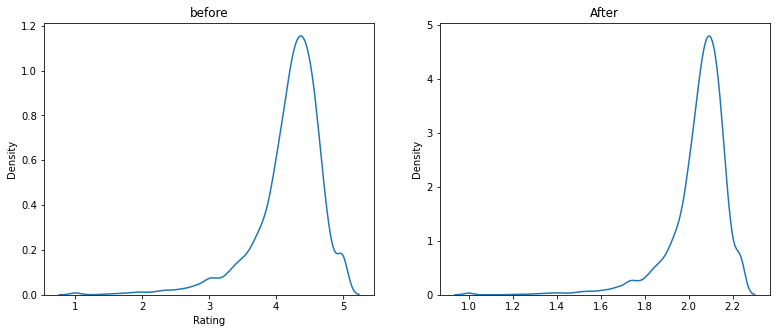

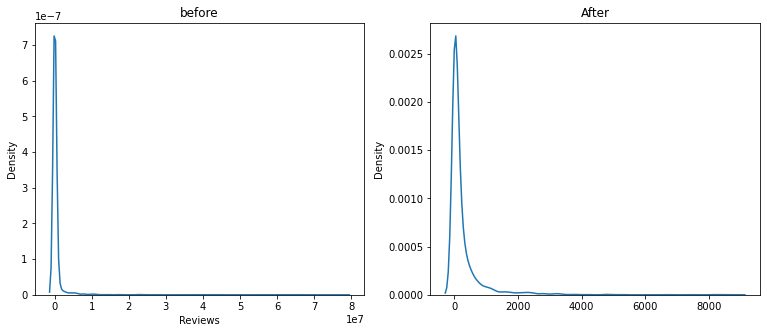

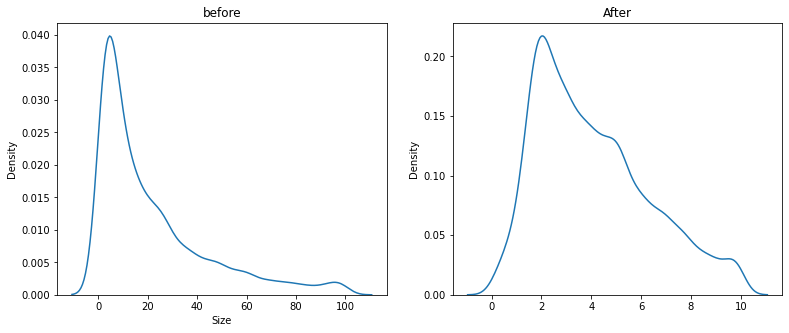

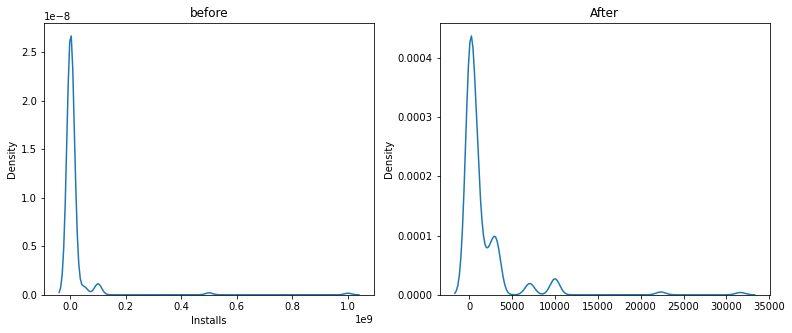

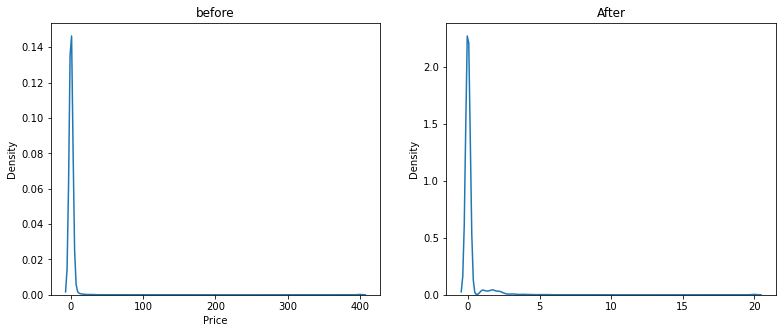

In [26]:
log_transformer = FunctionTransformer(np.sqrt)
for col in res_list:
    X = np.array(df[col])
    Y = log_transformer.transform(X)
    plots(df,col,Y)

#### Insights
- For our data Square root transformation is not working properly.
- Only sight change in Size distribution can be observed

#### 4.3) Yeo-Johnson Transformation

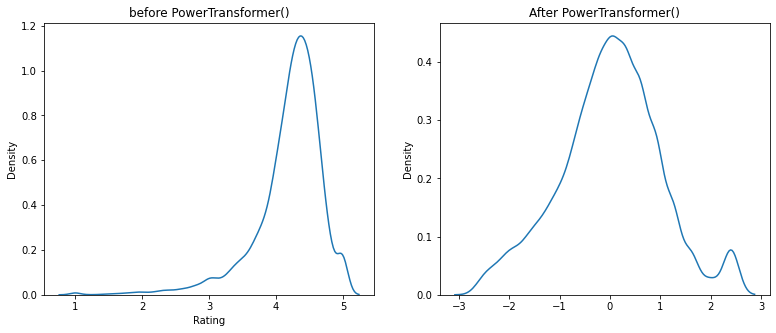

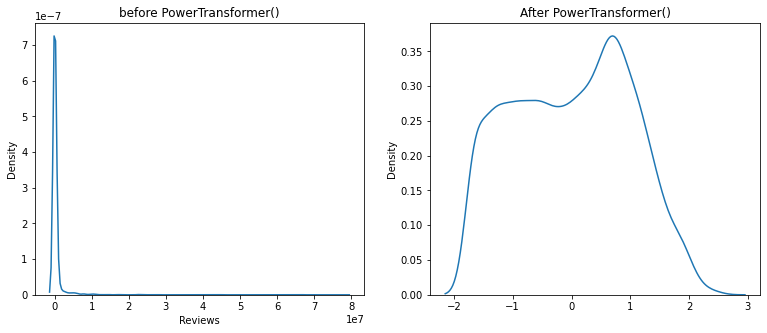

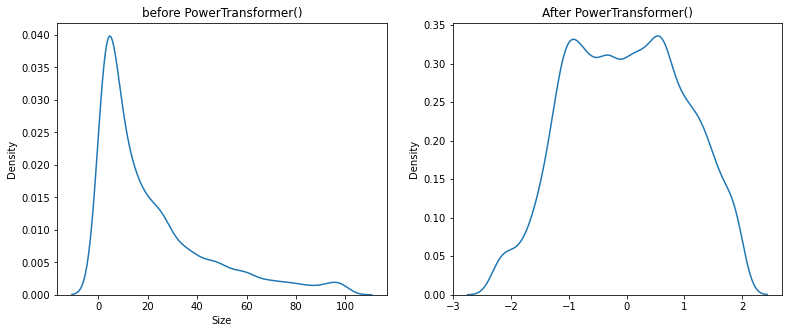

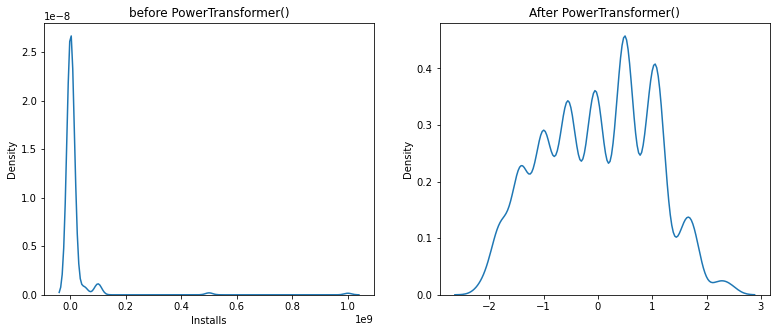

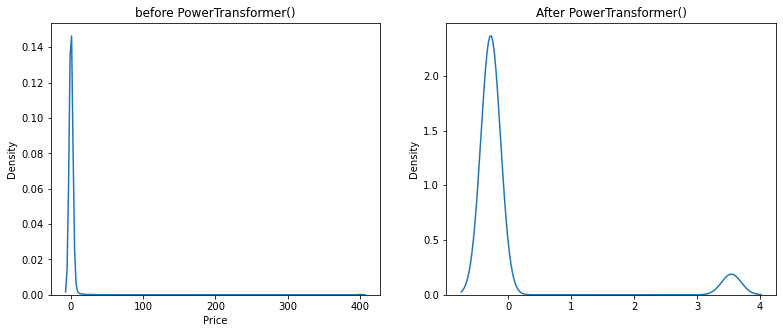

In [11]:
def power_plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in res_list:
    power_plots(df,col,PowerTransformer())

#### Insights
- For our data Power transformation is working properly.